***Note*** :  Run all cells at once to execute the code properly (Ctrl + F9), I used multiple code blocks as I'm learning; each block focuses on a specific task or concept.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
#handwritten images, the actual integers

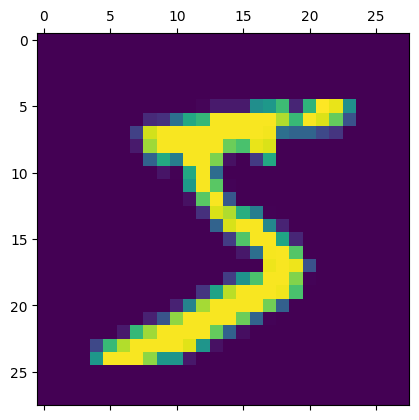

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print("No.of.training image data in X_train image & shape: ", X_train.shape)
print("No.of.test image data in X_test in image & shape: ", X_test.shape)

print("\nTotal actual 'training' integer equivalents to those images: ", y_train.shape)
print("Total actual 'test' integer equivalents to those images: ", y_test.shape)

No.of.training image data in X_train image & shape:  (60000, 28, 28)
No.of.test image data in X_test in image & shape:  (10000, 28, 28)

Total actual 'training' integer equivalents to those images:  (60000,)
Total actual 'test' integer equivalents to those images:  (10000,)


As each image is 28 x 28 pixels, and each pixel has, **pixel intensity values(0-255)**, which will result in 2D array (2*2 matrix - 28 rows and 28 columns) of these values, but should be converted to 1D, to assign these pixel intensity values to NEURONS, thereby 784 neurons corresponding to the 784 values, as a single array

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
# The 2D X_train & test is reshaped into 1D X_train & test

X_train_flattened.shape

(60000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4709 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2731 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9265


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2674 - accuracy: 0.9254


[0.2674451470375061, 0.9254000186920166]

As we can see, there is this thing I noticed, that is the loss is higher, when examining the code, we could do one thing to reduce the loss by a significant margin, i.e. dividing the training data (pixel intensity values) by 255, which eventually flattens the potential thing, which gets dominated during training.

And, Sigmoid function works best between 0 and 1, thus / by 255 makes our values fall into the range!

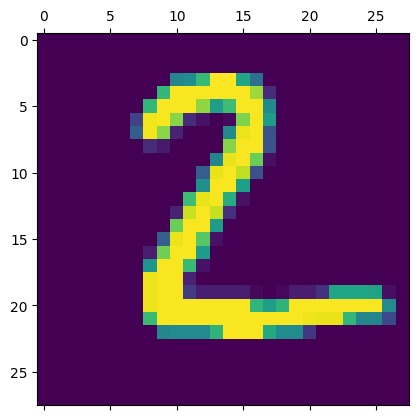

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_prediction_by_x = model.predict(X_test_flattened)
y_prediction_by_x[2]

313/313 [==============================] - 0s 1ms/step


array([3.8596315e-04, 9.9276114e-01, 6.5816873e-01, 2.8103185e-01,
       2.8056450e-02, 8.8876821e-02, 1.6670316e-01, 1.3863696e-01,
       3.8996154e-01, 5.0152086e-02], dtype=float32)

In [ ]:
import numpy as np
np.argmax(y_prediction_by_x[2])

1

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_prediction_by_x]

In [ ]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    7,  927,   15,    7,    2,   13,   11,   42,    2],
       [   3,    0,   20,  920,    0,   20,    2,   12,   28,    5],
       [   2,    1,    3,    1,  919,    0,   11,    4,   11,   30],
       [  11,    3,    3,   33,   10,  757,   18,    8,   43,    6],
       [  10,    3,    7,    1,    7,    8,  917,    2,    3,    0],
       [   1,    5,   23,    7,    9,    0,    0,  951,    4,   28],
       [   5,    6,    6,   18,    9,   18,   10,   10,  887,    5],
       [  10,    7,    1,   10,   33,    5,    0,   24,   13,  906]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'True values')

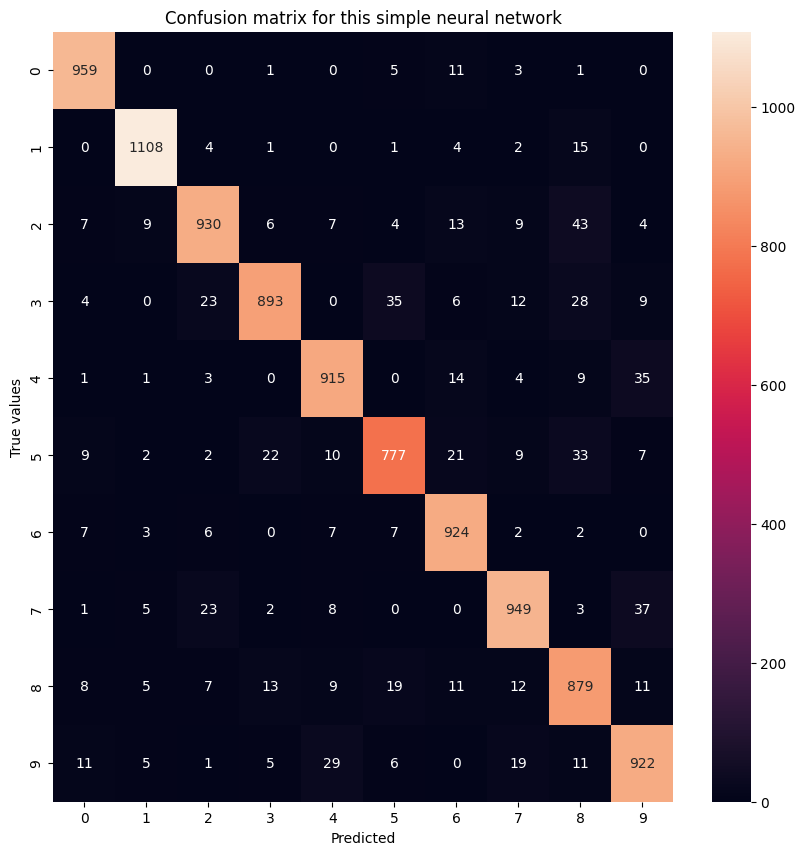

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion matrix for this simple neural network")
plt.xlabel('Predicted')
plt.ylabel('True values')

The confusion matrix tells us how the model performed. Here, 43 times our single layered model predicted '8' but the actual value was '2'. To improve the accuracy, we can add more hidden layers, to make the model less prone to errors!

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2762 - accuracy: 0.9206
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1242 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0881 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0653 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0530 - accuracy: 0.9841


So, in the above code, I added a dense layer again, this time with 100 neurons. Each 1 neuron is connected to the 784 input layer neurons. Thus, this is the HIDDEN LAYER here. Relu activation is used, to introduce non-linearity, as the MNIST images might have more than just linear shapes, this allows efficienct computing and learns the complex shapes found inside the MNIST Dataset images in training data.

As the first hidden layer would learn how to connect with the input neurons, we add another layer with 10 neurons, which is ofcourse the output layer and uses sigmoid function to squash the values between 0 and 1.

**This increased the accuracy from 0.92 to 0.98, comparing with the previous one, where there was only one layer, which is directly connected to the input layer, as 10 neurons would connect with that 784 neurons from the input layer and predict the possibility of the value falling between 0-10**

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9753


[0.08003310859203339, 0.9753000140190125]

With just 1 layer, the model performance improved!

In [ ]:
def predict_value(x):
  plt.matshow(X_test[x])
  print("\nThe predicted integer value: ", np.argmax(y_prediction_by_x[x]))
  print("\n")


The predicted integer value:  0




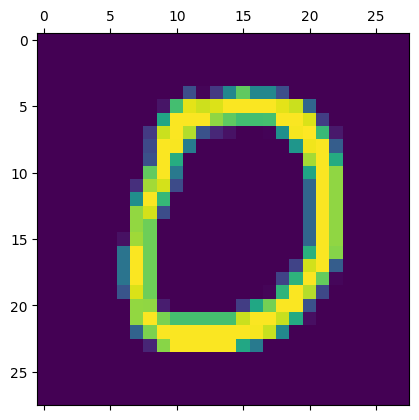

In [ ]:
predict_value(10)